
# Data Science Assignment: Exploring Documentation and Data Analysis Tools

In this assignment, you will explore three essential tools for data analysis in Python:
- **Pandas**
- **Matplotlib**
- One more Python data science package of your choice (e.g., `seaborn`, `scikit-learn`, `numpy`, etc.)

## Objectives:
1. **Research**: You will read the documentation for these libraries and explore some new or interesting features.
2. **Implementation**: You will demonstrate 5 different techniques or functionalities you have learned by analyzing a dataset of your choice.

### Steps:
1. **Explore the Pandas Documentation**: Visit the [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/). Look for interesting or new features that you have not yet explored. Examples could include handling missing data, merging data, or using advanced group-by functions.

2. **Explore the Matplotlib Documentation**: Visit the [Matplotlib Documentation](https://matplotlib.org/stable/contents.html). Look for advanced visualization techniques that will help you visualize your data.

3. **Select Another Library**: Choose another data science library you are interested in, such as `seaborn`, `scikit-learn`, or `numpy`. Visit its documentation, learn something new, and apply it to your dataset.

### Requirements:
- **Markdown Documentation**: For each technique or method you implement, explain what it does and why you chose it in a markdown cell before each code block.
- **Code Implementation**: After the markdown explanation, provide a code block where you implement the feature with your dataset.

---

### Example Dataset
You are free to use any dataset of your choice. If you don't have one, you can download some popular datasets from websites like [Kaggle](https://www.kaggle.com/datasets) or use in-built datasets in Python libraries like [seaborn](https://www.geeksforgeeks.org/seaborn-datasets-for-data-science/) or [sklearn](https://scikit-learn.org/1.5/datasets/real_world.html).



## Task 1: Pandas Documentation

Research and choose two interesting functions or techniques from the Pandas documentation that are useful for data analysis. You may explore new ways to handle missing data, merge datasets, or advanced grouping techniques.

### Example:
- **Pandas Method**: `pd.merge()` - Use this function to merge two dataframes.
- **Why I chose this**: Merging data from different sources is a common task in data analysis, and this function is highly efficient.



In [150]:

# Task 1: Pandas Method 1
# Code goes here: Implement a pandas method you researched from the documentation.
import pandas as pd
df_Electric = pd.read_csv('Electric (kWh).csv')
df_Electric['% Change'] = df_Electric['% Change'].str.replace('%', '').astype(float)
sorted_data = df_Electric.sort_values(by='% Change', ascending=False)
top_10 = sorted_data.head(10).copy()
print(top_10.to_string())
top_10.insert(1, 'Consumption', 'KWh')
top_10.insert(2, 'Changes over threshold', 'Increased over threshold')
output_file = 'top_10_%_change.xlsx'
top_10.to_excel(output_file, index=False)
print(f"top 10 % change has been saved to {output_file}!")


                             Sitename  CY 3-month Trend/Units of Work  PY adj 3-month Trend/Units of Work  % Change
0           4147-Carlyle - 8th Street                          1.1655                               0.405    187.43
1       5151-Denver - Enterprise Park                          3.2668                               1.650     98.00
2   3973-Milwaukee - U.S. Bank Center                          2.8169                               1.495     88.38
3  6591-Earth City - 3180 Rider Trail                          2.1354                               1.134     88.36
4      6343-St. Louis - Bissell Hills                          2.3146                               1.258     83.97
5         3691-Iowa City - Washington                          1.5587                               0.919     69.54
6        8691-The Dalles - Washington                          1.6325                               0.983     65.99
7   8016-Great Falls - 10th Avenue HB                          2.8342   

In [154]:

# Task 1: Pandas Method 2
# Code goes here: Implement another pandas method you researched from the documentation.
import pandas as pd
top_10 = pd.read_excel('top_10_%_change.xlsx')
Repeatoffenders = pd.read_excel('Repeat Offenders.xlsx')
merged_data = pd.concat([top_10, Repeatoffenders], ignore_index=True)
new_month = "2024-08-01"
new_row = pd.DataFrame([[f"{new_month} 00:00:00"] + [pd.NA] * (len(merged_data.columns)-1)], columns=merged_data.columns)
new_row = new_row.dropna(axis=1, how='all')
merged_data = pd.concat([new_row, merged_data], ignore_index=True)
merged_data = merged_data.dropna(axis =1, how='all')    
merged_output_file = 'UpdatedRepeatoffenders.xlsx'
merged_data.to_excel(merged_output_file, index=False)
print(f"Merged data has been saved to {merged_output_file}")

Merged data has been saved to UpdatedRepeatoffenders.xlsx


<mark>Type Analysis Here</mark> I am using the current work data to replace the old Macro function in Excel. We need to analyze the Top 10 client sites from the raw data set. Step 1: Read the .csv file. Once I printed my data I noticed that my data is not printed in the same line. I used the to_string to covernt my data to a console-friendly tabular output. Step 2 filter for the top 10% changes in client's profilo. Initially, I realized that the filter doesn't filter my top 10 properly due to the data type.  In order to make the proper filter for the top 10 sites. I implemented the "astype" method to covert my data type. Step 3, I added two columns to ensure my output data lines up with my repeat offenders workbook columns. Step 4 Merge files: Since the raw data needs to generate every month, I want to insert a date for the output. I merged the cleaned raw out put data into the repeat offenders workbook. By learning the merge file, I learned that in order to successfully merge the file, you need to have the columns match in both data frames. 


## Task 2: Matplotlib Documentation

Explore the Matplotlib documentation and implement two different types of visualizations. You may explore functions for customizing plots, adding annotations, or plotting with subplots.

### Example:
- **Matplotlib Method**: `plt.subplot()` - Create multiple subplots in a single figure.
- **Why I chose this**: Subplots allow me to visualize multiple variables side by side in one figure.



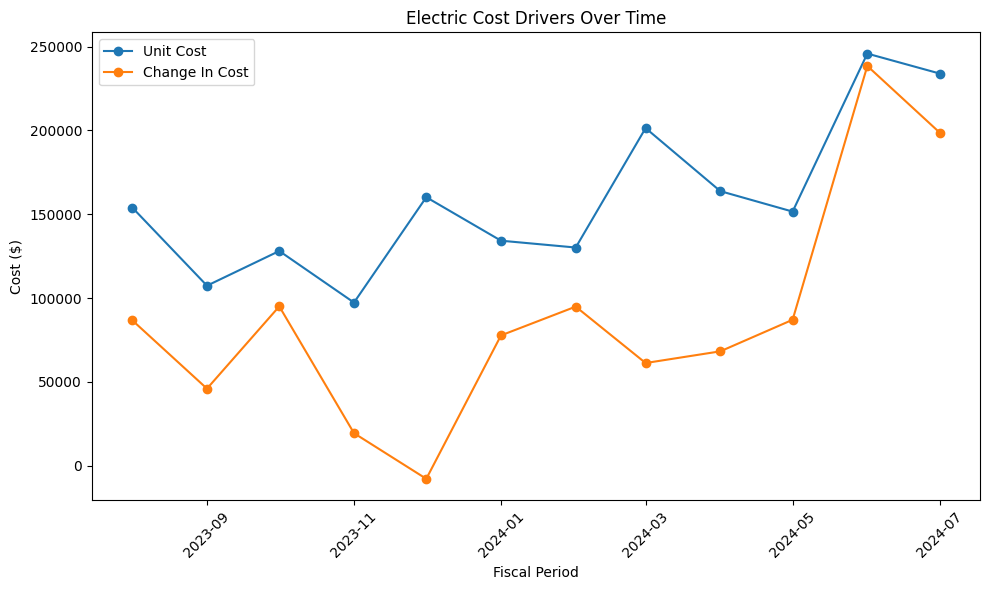

In [191]:

# Task 2: Matplotlib Visualization 1
# Code goes here: Implement a visualization from the matplotlib documentation.
import pandas as pd
import matplotlib.pyplot as plt
df_Cost_Drivers = pd.read_csv('Electric Cost Drivers.csv')

df_Cost_Drivers['UnitCost'] = df_Cost_Drivers['UnitCost'].replace({'\$':'', '\(': '-','\)': ''},regex=True).astype(float)
df_Cost_Drivers['UsageCost'] = df_Cost_Drivers['UsageCost'].replace({'\$':'', '\(': '-','\)': ''},regex=True).astype(float)
df_Cost_Drivers['WeatherCost'] = df_Cost_Drivers['WeatherCost'].replace({'\$':'', '\(': '-','\)': ''},regex=True).astype(float)
df_Cost_Drivers['Change In Cost'] = df_Cost_Drivers['Change In Cost'].replace({'\$':'', '\(': '-','\)': ''},regex=True).astype(float)
df_Cost_Drivers['FiscalPeriod'] = pd.to_datetime(df_Cost_Drivers['FiscalPeriod'])
df_Cost_Drivers.set_index('FiscalPeriod', inplace=True)
plt.figure(figsize=(10,6))
plt.plot(df_Cost_Drivers.index, df_Cost_Drivers['UnitCost'], label='Unit Cost', marker='o')
plt.plot(df_Cost_Drivers.index, df_Cost_Drivers['Change In Cost'],label='Change In Cost', marker='o')
plt.xlabel('Fiscal Period')
plt.ylabel('Cost ($)')
plt.title('Electric Cost Drivers Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

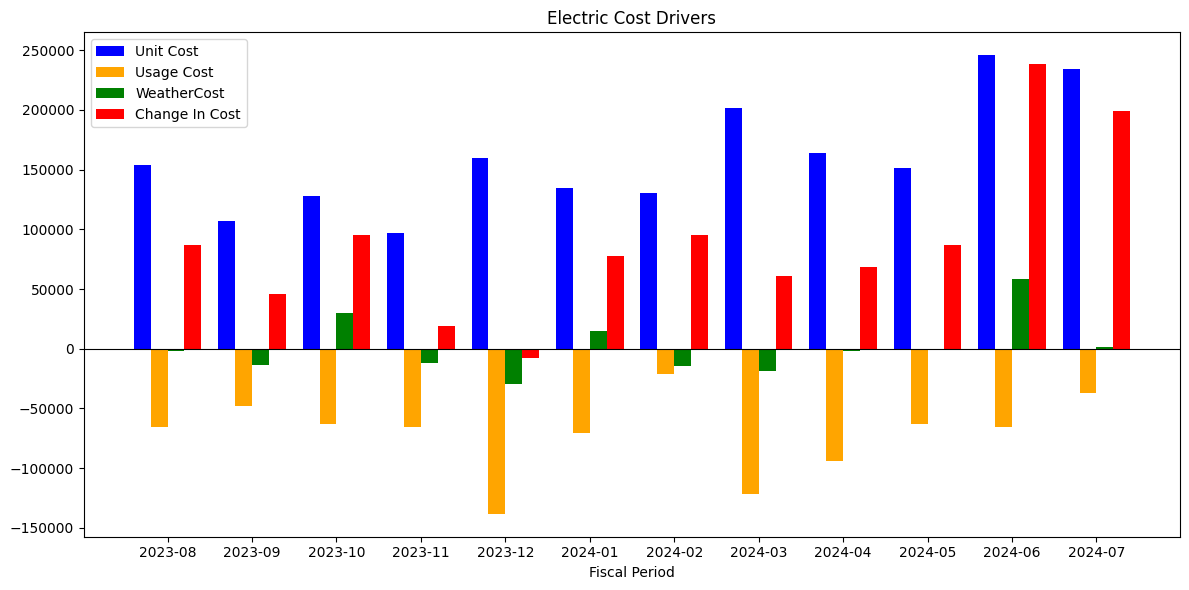

In [189]:

# Task 2: Matplotlib Visualization 2
# Code goes here: Implement another visualization from the matplotlib documentation.

import pandas as pd
import matplotlib.pyplot as plt
df_Cost_Drivers = pd.read_csv('Electric Cost Drivers.csv')

df_Cost_Drivers['UnitCost'] = df_Cost_Drivers['UnitCost'].replace({'\$':'', '\(': '-','\)': ''},regex=True).astype(float)
df_Cost_Drivers['UsageCost'] = df_Cost_Drivers['UsageCost'].replace({'\$':'', '\(': '-','\)': ''},regex=True).astype(float)
df_Cost_Drivers['WeatherCost'] = df_Cost_Drivers['WeatherCost'].replace({'\$':'', '\(': '-','\)': ''},regex=True).astype(float)
df_Cost_Drivers['Change In Cost'] = df_Cost_Drivers['Change In Cost'].replace({'\$':'', '\(': '-','\)': ''},regex=True).astype(float)
df_Cost_Drivers['FiscalPeriod'] = pd.to_datetime(df_Cost_Drivers['FiscalPeriod'])
df_Cost_Drivers.set_index('FiscalPeriod', inplace=True)
plt.figure(figsize=(12,6))
bar_width = 0.2
x = range(len(df_Cost_Drivers))
plt.bar(x, df_Cost_Drivers['UnitCost'], width=bar_width, label='Unit Cost', color='blue', align='center')
plt.bar([i + bar_width for i in x], df_Cost_Drivers['UsageCost'], width=bar_width, label='Usage Cost', color='orange', align='center')
plt.bar([i +2 * bar_width for i in x], df_Cost_Drivers['WeatherCost'], width=bar_width, label='WeatherCost', color='green', align='center')
plt.bar([i +3 * bar_width for i in x], df_Cost_Drivers['Change In Cost'],width=bar_width, label='Change In Cost', color='red', align='center')

plt.xlabel('Fiscal Period')
plt.title('Electric Cost Drivers')
plt.xticks([i + 1.5 * bar_width for i in x], df_Cost_Drivers.index.strftime('%Y-%m'))
plt.axhline(0, color='black', linewidth=0.8)
plt.legend()
plt.tight_layout()
plt.show

I made this chart and realized that it can't not repressent the data clearly. 

<function matplotlib.pyplot.show(close=None, block=None)>

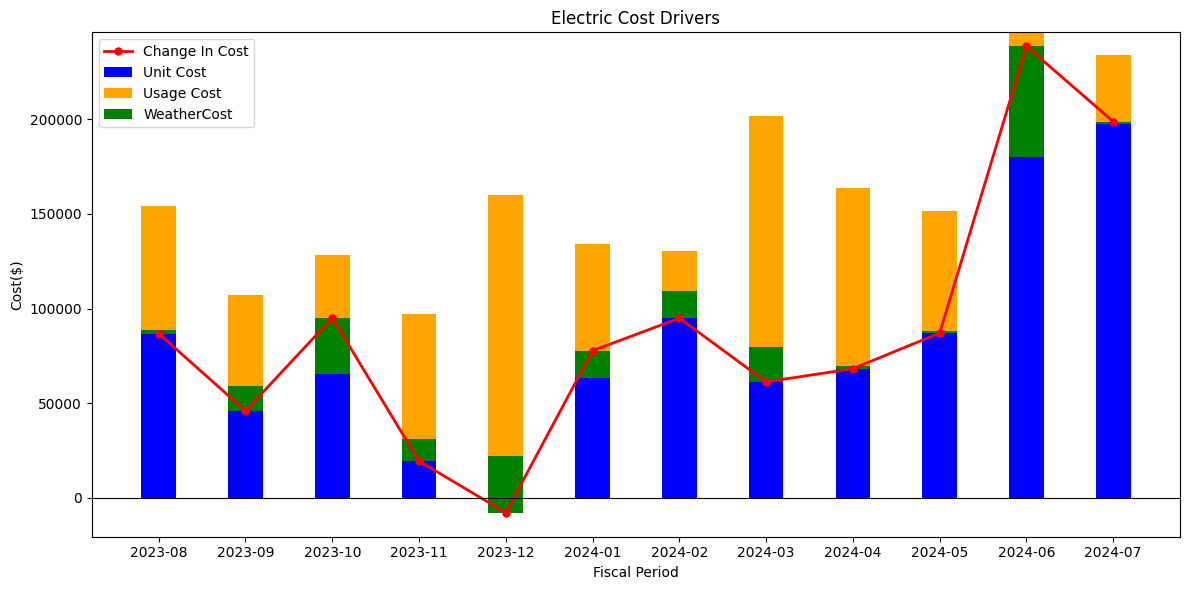

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
df_Cost_Drivers = pd.read_csv('Electric Cost Drivers.csv')

df_Cost_Drivers['UnitCost'] = df_Cost_Drivers['UnitCost'].replace({'\$':'', '\(': '-','\)': ''},regex=True).astype(float)
df_Cost_Drivers['UsageCost'] = df_Cost_Drivers['UsageCost'].replace({'\$':'', '\(': '-','\)': ''},regex=True).astype(float)
df_Cost_Drivers['WeatherCost'] = df_Cost_Drivers['WeatherCost'].replace({'\$':'', '\(': '-','\)': ''},regex=True).astype(float)
df_Cost_Drivers['Change In Cost'] = df_Cost_Drivers['Change In Cost'].replace({'\$':'', '\(': '-','\)': ''},regex=True).astype(float)
df_Cost_Drivers['FiscalPeriod'] = pd.to_datetime(df_Cost_Drivers['FiscalPeriod'])
df_Cost_Drivers.set_index('FiscalPeriod', inplace=True)
plt.figure(figsize=(12,6))
bar_width = 0.4
x = range(len(df_Cost_Drivers))
plt.bar(x, df_Cost_Drivers['UnitCost'], width=bar_width, label='Unit Cost', color='blue', align='center')
plt.bar(x, df_Cost_Drivers['UsageCost'], width=bar_width, label='Usage Cost', color='orange', bottom=df_Cost_Drivers['UnitCost'], align='center')
plt.bar(x, df_Cost_Drivers['WeatherCost'], width=bar_width, label='WeatherCost', color='green',bottom=df_Cost_Drivers['UnitCost'] + df_Cost_Drivers['UsageCost'], align='center')


plt.plot(x, df_Cost_Drivers['Change In Cost'], label='Change In Cost', color='red', marker='o', linewidth=2, markersize=5)
plt.xlabel('Fiscal Period')
plt.ylabel('Cost($)')
plt.title('Electric Cost Drivers')
plt.xticks(x,df_Cost_Drivers.index.strftime('%Y-%m'))
plt.axhline(0, color='black', linewidth=0.8)
plt.legend()
plt.tight_layout()
plt.show()

<mark>Type Analysis Here</mark>

The raw data I have is electric cost drivers over a specific period of time. The first line chart that I created is for identifying periods of higher or lower cost changes. It appears to me that the Unit Cost is relatively stable with periodic flucutions but a general upward trend. However, the change in cost shows more variability, with a greater numbers of peaks. 
Both metrics experience a noticible spike in the later fiscal period, particularly between 2024-05 and 2024-07. This indicates the seasonal increases in cost. The first chart gives me an overview of the cost driver but I want to incorporte more information in one chart. Hence, I created the second bar chart to show change in cost, unit cost, usage cost and weather cost. However, the second chart didn't represent the data clearly. In order to create a clean and easy to read chart, I created the thrid stacked bar chart. 

The purpose of this chart is allow the client an easy comparison of different cost components. That includes unit cost, usage cost and weather cost all in one chart. It shows how each component contributes to the total cost over time. The unit cost is the main driver of the electric cost. Usage fluctuates significantly across the periods and the weather cost is realtively smaller but contributes noticeably in certain months, especially towards the end of the chart. The upward trend from 2023 to 2024 indicates overall rising cost. During summer the Unit cost is the main driver of the overall cost. However, it is oppsit in the winter, usage became the main driver of the the Electric cost. It is very obversouly, the weather drivers the month of June and the months of Dec cost up due to the heating degree days and the cooling degree days.(Decemebr 2023 looks like has some data error since unit cost disappeared.) 


## Task 3: Data Science Library of Your Choice

Choose another data science library (e.g., Seaborn, Scikit-Learn, Numpy) and research one method or technique that helps you analyze or visualize your data.

### Example:
- **Chosen Library**: `Seaborn`
- **Method**: `sns.heatmap()` - Plot heatmaps to visualize the correlation between different variables.
- **Why I chose this**: Heatmaps are useful to quickly identify relationships between features in a dataset.



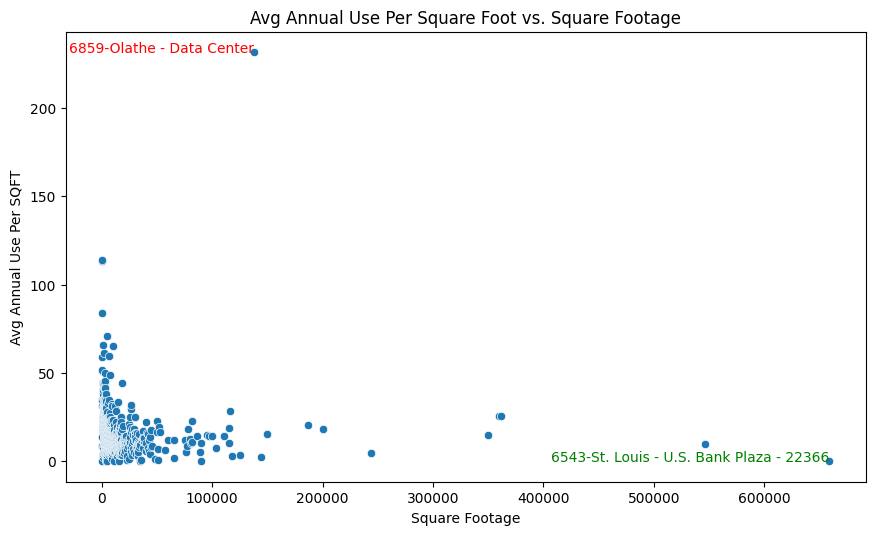

In [5]:

# Task 3: Library of Your Choice - Method 1
# Code goes here: Implement a method or functionality from a library of your choice.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_Annual_kWh_Per_SQFT= pd.read_csv('Electric Avg Annual kWh Per Unit.csv')
df_Annual_kWh_Per_SQFT.dropna(subset=['SquareFoot', 'Avg Annual Use Per SQFT'], inplace=True)
higest_avg_use_row = df_Annual_kWh_Per_SQFT.loc[df_Annual_kWh_Per_SQFT['Avg Annual Use Per SQFT'].idxmax()]
higest_sqft_row = df_Annual_kWh_Per_SQFT.loc[df_Annual_kWh_Per_SQFT['SquareFoot'].idxmax()]
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_Annual_kWh_Per_SQFT, x='SquareFoot', y='Avg Annual Use Per SQFT')
plt.title('Avg Annual Use Per Square Foot vs. Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Avg Annual Use Per SQFT')
plt.text(higest_avg_use_row['SquareFoot'], higest_avg_use_row['Avg Annual Use Per SQFT'],higest_avg_use_row['Site Name'], ha='right', color='red')
plt.text(lowest_sqft_row['SquareFoot'], lowest_sqft_row['Avg Annual Use Per SQFT'],lowest_sqft_row['Site Name'], ha='right', color='green')

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.15)
plt.show()

<mark>Type Analysis Here</mark>

By using seaborn, I created this chart to show the relationship between building's square footage and it's average annual use per square foot. 
The data represents the average annual electric usage in kWh per square foot for various buildings and facilities. 
The Avg annual use per sqft indicates energy efficiency. It tells us how much energy, on overage, is used for each square foot, which can indicate energy efficiency. Higher values suggest higher energy usage per SQFT that means less energy efficiency. 
The X-axis represnets the total square footage of each building. Larger buildings generally have different usage patterns compared to smaller onces. It helps understand how building size may influnce energy consumption per square foot. 
There is a clustering of buildings with smaller square footage and higher average annual use per square foot. 
As the square footage increases, the average annual use per square foot tends to decrease, indicating that larger buildings generally have lower usage rate per 
square foot. 

Most of the sites are scattered in the buttom of the left conner. I added the site label to the visulization to help quickly identify the energy efficiency issues. For example: 6859-Olathe Data Center has high average annual use per square foot with relatively small square footage compared to other points. However, the 6543-St Louis with the larger square footage but less energy use per square foot. The data suggested that smaller buildings are less energy efficient on a per square foot basis compared to larger buildings. 


## Assignment Submission & Grading

- Make sure to put your last name in the file name (this helps me with grading).
- Scoring will be on a 100 point scale (like all other assignment).
- Scoring criteria is based on how clean and complicated your code is and thoughtfulness of your analysis. 